# Farina in Natura - estratégia

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import datetime
import fpdf as FPDF


In [3]:
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
# para resolver o problema: "(unicode error) 'utf-8' codec can't decode "
# https://www.youtube.com/watch?v=ZSC7X4N8RKo,
#Erro: 
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 900: invalid continuation byte
# enem = pd.read_csv("MICRODADOS_ENEM_2020.csv", encoding="utf-8", sep = ';')
# enem = pd.read_csv("MICRODADOS_ENEM_2020.csv", encoding="ISO-8859-1", sep = ';')

transactions = pd.read_csv(r'C:\Users\ctobr\OneDrive\DATA_Science\1_farina_in_natura\farina_in_natura00\CSV\farina.CSV', 
encoding="ISO-8859-1", sep = ';')

In [5]:
transactions.head()

,venda,data_hora,cliente,mesa,item,produto,quantidade,valor_unit,desconto,total_item
0,460.0,01/02/2022 08:13,CONSUMIDOR,M 1,119.0,SUCO DE LARANJA 400ML,1.0,"14,5",0.0,"14,5"
1,460.0,01/02/2022 08:13,CONSUMIDOR,M 1,121.0,PAO SOURDOUGH OVOS,1.0,"15,5",0.0,"15,5"
2,461.0,01/02/2022 08:14,CONSUMIDOR,M 2,119.0,SUCO DE LARANJA 400ML,1.0,"14,5",0.0,"14,5"
3,461.0,01/02/2022 08:14,CONSUMIDOR,M 2,121.0,PAO SOURDOUGH OVOS,1.0,"15,5",0.0,"15,5"
4,465.0,01/02/2022 09:01,CONSUMIDOR,M 1,46.0,QUICHE BACON 90G,2.0,"19,5",0.0,39


In [6]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25998 entries, 0 to 25997
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   venda       25992 non-null  float64
 1   data_hora   25992 non-null  object 
 2   cliente     25992 non-null  object 
 3   mesa        22779 non-null  object 
 4   item        25922 non-null  float64
 5   produto     25992 non-null  object 
 6   quantidade  25992 non-null  float64
 7   valor_unit  25992 non-null  object 
 8   desconto    25992 non-null  float64
 9   total_item  25992 non-null  object 
dtypes: float64(4), object(6)
memory usage: 2.0+ MB


# Limpeza e manipulação dos dados

In [7]:
### CHECK OUT IF THE NUMBER OF TOTAL ENTRIES IS EQUAL TO THE NUMBER OF ENTRIES OF THE VARIABLES  

transactions.isnull().sum()

venda            6
data_hora        6
cliente          6
mesa          3219
item            76
produto          6
quantidade       6
valor_unit       6
desconto         6
total_item       6
dtype: int64

In [8]:
## DROPPING THE ROWS THAT ALL COLUMN VALUES ARE NULL
#  https://www.youtube.com/watch?v=uDr67HBIPz8&t=818s

transactions = transactions.dropna(how='all')

In [9]:
# Delete the column "item"

del transactions["item"]

In [10]:
transactions.info()
transactions.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25992 entries, 0 to 25997
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   venda       25992 non-null  float64
 1   data_hora   25992 non-null  object 
 2   cliente     25992 non-null  object 
 3   mesa        22779 non-null  object 
 4   produto     25992 non-null  object 
 5   quantidade  25992 non-null  float64
 6   valor_unit  25992 non-null  object 
 7   desconto    25992 non-null  float64
 8   total_item  25992 non-null  object 
dtypes: float64(3), object(6)
memory usage: 2.0+ MB


,venda,data_hora,cliente,mesa,produto,quantidade,valor_unit,desconto,total_item
0,460.0,01/02/2022 08:13,CONSUMIDOR,M 1,SUCO DE LARANJA 400ML,1.0,"14,5",0.0,"14,5"
1,460.0,01/02/2022 08:13,CONSUMIDOR,M 1,PAO SOURDOUGH OVOS,1.0,"15,5",0.0,"15,5"
2,461.0,01/02/2022 08:14,CONSUMIDOR,M 2,SUCO DE LARANJA 400ML,1.0,"14,5",0.0,"14,5"
3,461.0,01/02/2022 08:14,CONSUMIDOR,M 2,PAO SOURDOUGH OVOS,1.0,"15,5",0.0,"15,5"
4,465.0,01/02/2022 09:01,CONSUMIDOR,M 1,QUICHE BACON 90G,2.0,"19,5",0.0,39


In [11]:
## Using isna() to select all rows with NaN in the column ('mesa') and the value "CONSUMIDOR" on the column "cliente" 
## and replace the "mesa" value with "M0"
## https://datatofish.com/rows-with-nan-pandas-dataframe/
## https://www.geeksforgeeks.org/how-to-replace-values-in-column-based-on-condition-in-pandas/

transactions.loc[(transactions["cliente"] == 'CONSUMIDOR') &  (transactions['mesa'].isna()), 'mesa']= 'M0'


In [12]:
# Checking if the changes were correct.

transactions.loc[transactions["mesa"] == 'M0']

,venda,data_hora,cliente,mesa,produto,quantidade,valor_unit,desconto,total_item
121,520.0,02/02/2022 16:57,CONSUMIDOR,M0,BOMBOLONI NUTELLA 80G,2.0,12,0.0,24
122,520.0,02/02/2022 16:57,CONSUMIDOR,M0,TARTELETE DE MORANGO 120G,1.0,18,0.0,18
123,520.0,02/02/2022 16:57,CONSUMIDOR,M0,CROISSANT MUSSATRELA DE,1.0,"25,5",0.0,"25,5"
894,856.0,11/02/2022 19:19,CONSUMIDOR,M0,CROISSANT BRIE PARMA MEL DE,2.0,"25,5",0.0,51
895,856.0,11/02/2022 19:19,CONSUMIDOR,M0,VH SANTA HORTENSIA SAUVIG,1.0,59,0.0,59


In [13]:
# Assigning a value "ND" to the empty records in column "mesa"
# https://www.w3schools.com/python/pandas/pandas_cleaning_empty_cells.asp

transactions['mesa'].fillna("ND",inplace = True )

In [14]:
# Find Unique Values in the Column "produto"
# https://www.statology.org/pandas-unique-values-in-column/
transactions.produto.value_counts()

CROISSANT                         2393
PASTEL DE NATA 60G                1339
CROISSANT  AMENDOAS 100G           742
FOLHADO MACA 80G                   719
SANDUICHE DE PEPERONI BRIE         596
COOKIES 80G                        559
CROISSANT IFOOD                    534
SOURDOUGH AZEITONA E ALECRIM       517
FOLHADO FRANGO 160G                500
BOMBOLONI DOCE DE LEITE 80G        487
FOCACCIA FORMAGGIO 246G            460
AGUA MINERAL S/GAS 500ML           446
TORRADA FARINA 165G                435
CAFE EQUILIBRADO CAPSULA P         431
SOURDOUGH 369G                     431
LARANJA 400 ML                     430
MINI CROISSANT 25G KIT C 5         427
CROISSANT BRIE PARMA MEL DE        423
PIZZA AL TAGLIO GORGONZOLA E       421
MINI PAIN AU CHOCOLAT 35G          419
BOMBOLONI NUTELLA 80G              409
CROISSANT  TRADICIONAL 80 G        396
QUICHE DE FRANGO ALHO PORO         360
AGUA MINERAL SEM GAS 500 ML        341
COCA COLA LATA 350 ML              337
SUCO DE LARANJA 400ML    

In [15]:
## Get unique names in the "produto" column using Series.unique() 
## https://sparkbyexamples.com/pandas/pandas-count-unique-values-in-column/
transactions.produto.unique().size

212

In [16]:
# Convert the "venda" variable from float64 type to integer type
# https://stackoverflow.com/questions/43956335/convert-float64-column-to-int64-in-pandas

transactions['venda'] = np.int64(transactions['venda'])

In [17]:
# Convert "data" to datetime object
transactions['data_hora'] = pd.to_datetime(transactions['data_hora'], format='%d/%m/%Y %H:%M')

#How to Solve Python ValueError: unconverted data remains
#read://https_researchdatapod.com/?url=https%3A%2F%2Fresearchdatapod.com%2Fhow-to-solve-python-valueerror-unconverted-data-remains%2F

In [18]:
# Convert the "quantidade" variable from float64 type to integer type
# https://stackoverflow.com/questions/43956335/convert-float64-column-to-int64-in-pandas

transactions['quantidade'] = np.int64(transactions['quantidade'])

In [19]:
# change the decimal delimiter of the the variable "valor_unit" from "," to "."
# https://cursos.alura.com.br/forum/topico-transformar-pontos-por-virgulas-dentro-de-um-dataframe-121090
transactions['valor_unit'] = transactions['valor_unit'].str.replace(",",".")

# Convert the "valor_uni" variable from object type to float64 type
# https://www.statology.org/pandas-convert-object-to-float/

transactions['valor_unit'] = transactions['valor_unit'].astype(float)

In [20]:
# change the decimal delimiter of the the variable "total_item" from "," to "."
# https://cursos.alura.com.br/forum/topico-transformar-pontos-por-virgulas-dentro-de-um-dataframe-121090
transactions['total_item'] = transactions['total_item'].str.replace(",",".")

# Convert the "total_item" variable from object type to float64 type
# https://www.statology.org/pandas-convert-object-to-float/

transactions['total_item'] = transactions['total_item'].astype(float)

In [21]:
# Verificando se o valor "total_item" é igual a: "quantidade" * "valor_unit"

transactions["total_item_verif"] = transactions['quantidade']* transactions['valor_unit']

In [32]:
# Continuando o item anterior
# https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/

transactions['confirm'] = np.where(transactions['total_item'] < transactions['total_item_verif'], True, False)


In [33]:
# continuando o item anterior
transactions.loc[transactions["confirm"] == True].sum()

C:\Users\ctobr\AppData\Local\Temp\ipykernel_32952\3180257399.py:2: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  transactions.loc[transactions["confirm"] == True].sum()


venda                                                           58804
cliente             CONSUMIDORCONSUMIDORCONSUMIDORCONSUMIDORCONSUM...
mesa                                    M 4M 7M 9M 3M 6NDNDNDM 9M 8ND
produto             AGUA MINERAL SEM GAS 500 MLMINI CROISSANT 25GA...
quantidade                                                         33
valor_unit                                                      100.6
desconto                                                          0.0
total_item                                                      301.8
total_item_verif                                                301.8
confirm                                                            11
dtype: object

In [34]:
ts2 = transactions.loc[transactions["confirm"] == True]

In [35]:
ts2

,venda,data_hora,cliente,mesa,produto,quantidade,valor_unit,desconto,total_item,total_item_verif,confirm
1154,939,2022-02-13 19:25:00,CONSUMIDOR,M 4,AGUA MINERAL SEM GAS 500 ML,3,6.9,0.0,20.7,20.7,True
1860,1233,2022-02-21 18:04:00,CONSUMIDOR,M 7,MINI CROISSANT 25G,3,4.2,0.0,12.6,12.6,True
2510,1474,2022-03-02 07:54:00,CONSUMIDOR,M 9,AGUA MINERAL SEM GAS 500 ML,3,6.9,0.0,20.7,20.7,True
5072,1897,2022-03-31 19:57:00,CONSUMIDOR,M 3,MINI CROISSANT 25G,3,4.2,0.0,12.6,12.6,True
5566,2725,2022-04-08 09:45:00,CONSUMIDOR,M 6,MINI CROISSANT 25G,3,4.2,0.0,12.6,12.6,True
17999,7328,2022-08-14 08:54:00,IFOOD,ND,BOMBOLONI DOCE DE LEITE 80G,3,13.8,0.0,41.4,41.4,True
18309,7434,2022-08-17 10:41:00,IFOOD,ND,BOMBOLONI NUTELLA 80G IFOOD,3,13.8,0.0,41.4,41.4,True
21491,8642,2022-09-16 09:52:00,IFOOD,ND,BOMBOLONI NUTELLA 80G,3,13.8,0.0,41.4,41.4,True
21659,8699,2022-09-17 16:58:00,CONSUMIDOR,M 9,CROISSANT AMENDOAS 100G,3,14.8,0.0,44.4,44.4,True
22608,9051,2022-09-27 19:07:00,CONSUMIDOR,M 8,MINI CROISSANT 25G,3,4.2,0.0,12.6,12.6,True


In [36]:
# Exporting to a pdf file the transactions that has a inconsistent data.
from matplotlib.backends.backend_pdf import PdfPages


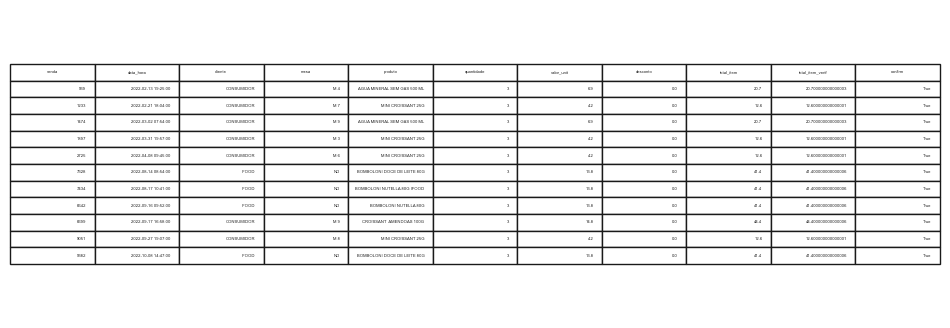

In [37]:
# https://www.alixaprodev.com/2022/05/convert-pandas-dataframe-to-pdf-in-python.html
fig, ax =plt.subplots(figsize=(12,4))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=ts2.values,colLabels=ts2.columns,loc='center')




In [39]:
pp = PdfPages("foo2.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()